#  *segmentation of items of market data based on their weight, visibility and MRP*

**this is kmeans clustering algorithm to identitfy items based on their various features.**

project by - 'Krishna Kumar'

In [75]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [76]:
# read csv file
data= pd.read_csv("C:/Users/lenovo/Desktop/myproject/files/bazar.csv")

In [77]:
# first few rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
data.shape

(5681, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


In [78]:
# there are null values in the data. to check how many percentage of null velues is there in the data
100*(data.isnull().sum()/len(data))

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [79]:
# replace null value with 0
data= data.fillna(0)
data.shape

(5681, 11)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


In [82]:
# make the diffrent tables for different features
weight= data.groupby("Item_Identifier")["Item_Weight"].sum()
weight= weight.reset_index()
weight.head()

,Item_Identifier,Item_Weight
0,DRA12,23.200
1,DRA24,58.050
2,DRA59,16.540
3,DRB01,29.560
4,DRB13,18.345


In [83]:
visibility= data.groupby("Item_Identifier")["Item_Visibility"].sum()
visibility= visibility.reset_index()
visibility.head()

,Item_Identifier,Item_Visibility
0,DRA12,0.122703
1,DRA24,0.120028
2,DRA59,0.256091
3,DRB01,0.391509
4,DRB13,0.021176


In [84]:
mrp = data.groupby("Item_Identifier")["Item_MRP"].sum()
mrp = mrp.reset_index()
mrp.head()

,Item_Identifier,Item_MRP
0,DRA12,423.9462
1,DRA24,491.5604
2,DRA59,368.3848
3,DRB01,950.3650
4,DRB13,759.7120


In [85]:
df_frame= pd.merge(weight, visibility, how= "inner", on= "Item_Identifier")

In [86]:
df_frame.head()

,Item_Identifier,Item_Weight,Item_Visibility
0,DRA12,23.200,0.122703
1,DRA24,58.050,0.120028
2,DRA59,16.540,0.256091
3,DRB01,29.560,0.391509
4,DRB13,18.345,0.021176


In [87]:
df_frame1= pd.merge(df_frame, mrp,  how= "inner", on= "Item_Identifier")
df_frame1.columns= ["ID", "weight","visibility", "MRP"]

In [88]:
df_frame1.head()

,ID,weight,visibility,MRP
0,DRA12,23.200,0.122703,423.9462
1,DRA24,58.050,0.120028,491.5604
2,DRA59,16.540,0.256091,368.3848
3,DRB01,29.560,0.391509,950.3650
4,DRB13,18.345,0.021176,759.7120


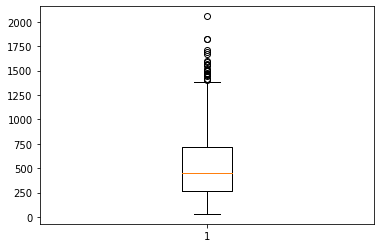

In [90]:
# draw boxplots to check outliers
plt.boxplot(df_frame1["MRP"])
plt.show()

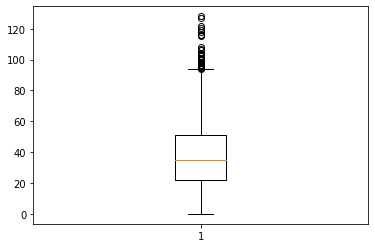

In [91]:
plt.boxplot(df_frame1["weight"])
plt.show()

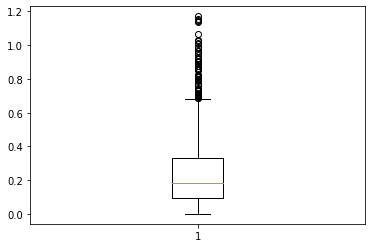

In [92]:
plt.boxplot(df_frame1["visibility"])
plt.show()

In [93]:
Q1 = df_frame1.weight.quantile(0.09)
Q3 = df_frame1.weight.quantile(0.95)
IQR = Q3 - Q1
grouped_df = df_frame1[(df_frame1.weight >= Q1 - 1.5*IQR) & (df_frame1.weight <= Q3 + 1.5*IQR)]

Q1 = df_frame1.visibility.quantile(0.09)
Q3 = df_frame1.visibility.quantile(0.95)
IQR = Q3 - Q1
grouped_df = df_frame1[(df_frame1.visibility >= Q1 - 1.5*IQR) & (df_frame1.visibility <= Q3 + 1.5*IQR)]

Q1 = df_frame1.MRP.quantile(0.09)
Q3 = df_frame1.MRP.quantile(0.95)
IQR = Q3 - Q1
grouped_df = df_frame1[(df_frame1.MRP >= Q1 - 1.5*IQR) & (df_frame1.MRP <= Q3 + 1.5*IQR)]



In [94]:
# scaling of the data
df_frame2= grouped_df[["weight", "visibility", "MRP"]]
scaler= StandardScaler()
df_frame2_scaled= scaler.fit_transform(df_frame2)

In [95]:
df_frame2_scaled.shape

(1543, 3)

In [96]:
df_frame2_scaled= pd.DataFrame(df_frame2_scaled)


In [97]:
df_frame2_scaled.head()
df_frame2_scaled.columns= ["weight", "visibility", "MRP"]
df_frame2_scaled.head()

,weight,visibility,MRP
0,-0.694774,-0.590941,-0.297254
1,0.866117,-0.604209,-0.086293
2,-0.993068,0.070721,-0.470610
3,-0.409917,0.742452,1.345208
4,-0.912224,-1.094559,0.750358


In [98]:
kmeans= KMeans(n_clusters= 4, max_iter= 80)
kmeans.fit(df_frame2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=80,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
kmeans.labels_

array([2, 0, 2, ..., 3, 3, 2])

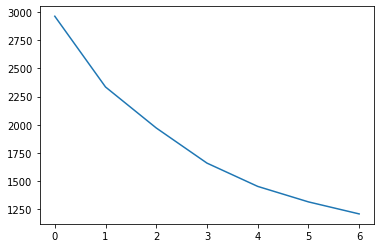

In [101]:
# elbow curve for cluster selection
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_frame2_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [50]:
# silhoutte score for cluster selection
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_frame2_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_frame2_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.36496185799460945
For n_clusters=3, the silhouette score is 0.3573491832366703
For n_clusters=4, the silhouette score is 0.3426585542199627
For n_clusters=5, the silhouette score is 0.29081428199649884
For n_clusters=6, the silhouette score is 0.29474287523463594
For n_clusters=7, the silhouette score is 0.2708284101233597
For n_clusters=8, the silhouette score is 0.260952680822412


In [102]:
# kmeans clustering
kmeans= KMeans(n_clusters= 4, max_iter= 80)
kmeans.fit(df_frame2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=80,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
# merge clusters as cluster ID in the data frame
df_frame1["cluster ID"]= kmeans.labels_

In [107]:
df_frame1.head()

,ID,weight,visibility,MRP,cluster ID
0,DRA12,23.200,0.122703,423.9462,0
1,DRA24,58.050,0.120028,491.5604,2
2,DRA59,16.540,0.256091,368.3848,0
3,DRB01,29.560,0.391509,950.3650,1
4,DRB13,18.345,0.021176,759.7120,1


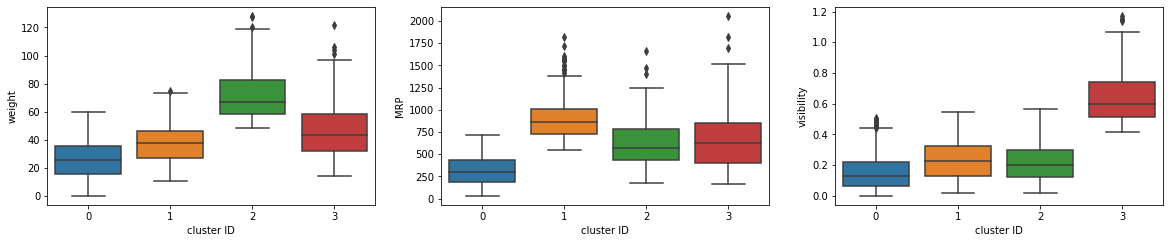

In [109]:
# plot clusters
plt.figure(figsize= (20,8))
plt.subplot(2,3,1)
sns.boxplot(x="cluster ID", y= "weight", data= df_frame1)
plt.subplot(2,3,2)
sns.boxplot(x="cluster ID", y= "MRP", data= df_frame1)
plt.subplot(2,3,3)
sns.boxplot(x="cluster ID", y= "visibility", data= df_frame1)
plt.show()

**THANK YOU**